In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [ ]:
# Loading the DataSet
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

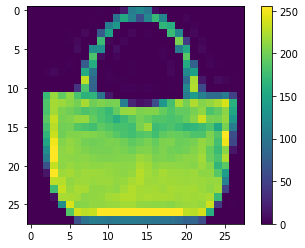

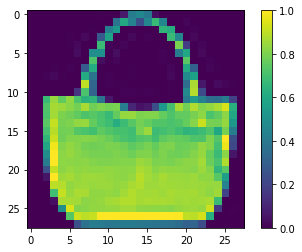

In [ ]:
# Data Pre-Processing

## Data has 0-255 pixel value range 
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

## Scale values in the range 0 to 1 (Divide by 255)
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Building up the Neural Network

## 1st layer - Flatten/Unstacking: 28x28 -> 1x784 (No Parameters, only reformatting the data)
## 2nd layer - Dense: 128 nodes/neurons
## 3rd layer - Dense: 10 nodes/neurons for 10 output classes

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model

## Loss Function - Measures accuracy of model training
## Optimizer - How model is updated based on data and Loss function
## Metrics - Monitors training/testing steps (or incorrectly classified)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1514 - accuracy: 0.9432
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1500 - accuracy: 0.9435
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1463 - accuracy: 0.9452
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1426 - accuracy: 0.9461
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1391 - accuracy: 0.9462
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1373 - accuracy: 0.9495
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1350 - accuracy: 0.9489
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1309 - accuracy: 0.9502
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1302 - accuracy: 0.9507
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.127

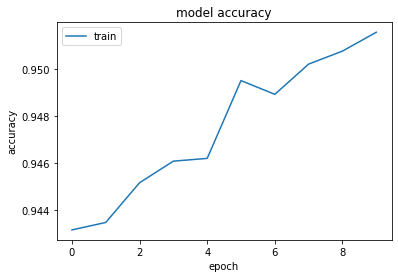

In [ ]:
# Train the Neural Network and plot the accuracy
history = model.fit(train_images, train_labels, epochs=10)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Accuracy Evaluation
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.4669 - accuracy: 0.8835


In [ ]:
# Predict an input image using model
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

## Gives a measure of confidence of each image for each class
predictions = probability_model.predict(test_images)
np.argmax(predictions[0]), test_labels[0]


(9, 9)

In [ ]:
# Verification via a graph
 

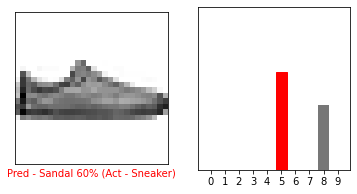

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred - {} {:2.0f}% (Act - {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()